In [1]:
import pandas as pd
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from sklearn.manifold import TSNE
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv('crypto_data.csv')

In [3]:
df

,Unnamed: 0,CoinName,Algorithm,IsTrading,ProofType,TotalCoinsMined,TotalCoinSupply
0,42,42 Coin,Scrypt,True,PoW/PoS,4.199995e+01,42
1,365,365Coin,X11,True,PoW/PoS,NaN,2300000000
2,404,404Coin,Scrypt,True,PoW/PoS,1.055185e+09,532000000
3,611,SixEleven,SHA-256,True,PoW,NaN,611000
4,808,808,SHA-256,True,PoW/PoS,0.000000e+00,0
...,...,...,...,...,...,...,...
1247,XBC,BitcoinPlus,Scrypt,True,PoS,1.283270e+05,1000000
1248,DVTC,DivotyCoin,Scrypt,False,PoW/PoS,2.149121e+07,100000000
1249,GIOT,Giotto Coin,Scrypt,False,PoW/PoS,NaN,233100000
1250,OPSC,OpenSourceCoin,SHA-256,False,PoW/PoS,NaN,21000000


In [4]:
df = df.rename(columns={"Unnamed: 0":" Ticker"})

In [5]:
df

,Ticker,CoinName,Algorithm,IsTrading,ProofType,TotalCoinsMined,TotalCoinSupply
0,42,42 Coin,Scrypt,True,PoW/PoS,4.199995e+01,42
1,365,365Coin,X11,True,PoW/PoS,NaN,2300000000
2,404,404Coin,Scrypt,True,PoW/PoS,1.055185e+09,532000000
3,611,SixEleven,SHA-256,True,PoW,NaN,611000
4,808,808,SHA-256,True,PoW/PoS,0.000000e+00,0
...,...,...,...,...,...,...,...
1247,XBC,BitcoinPlus,Scrypt,True,PoS,1.283270e+05,1000000
1248,DVTC,DivotyCoin,Scrypt,False,PoW/PoS,2.149121e+07,100000000
1249,GIOT,Giotto Coin,Scrypt,False,PoW/PoS,NaN,233100000
1250,OPSC,OpenSourceCoin,SHA-256,False,PoW/PoS,NaN,21000000


In [6]:
df = df.loc[df['IsTrading'] == True]

In [7]:
df

,Ticker,CoinName,Algorithm,IsTrading,ProofType,TotalCoinsMined,TotalCoinSupply
0,42,42 Coin,Scrypt,True,PoW/PoS,4.199995e+01,42
1,365,365Coin,X11,True,PoW/PoS,NaN,2300000000
2,404,404Coin,Scrypt,True,PoW/PoS,1.055185e+09,532000000
3,611,SixEleven,SHA-256,True,PoW,NaN,611000
4,808,808,SHA-256,True,PoW/PoS,0.000000e+00,0
...,...,...,...,...,...,...,...
1243,SERO,Super Zero,Ethash,True,PoW,NaN,1000000000
1244,UOS,UOS,SHA-256,True,DPoI,NaN,1000000000
1245,BDX,Beldex,CryptoNight,True,PoW,9.802226e+08,1400222610
1246,ZEN,Horizen,Equihash,True,PoW,7.296538e+06,21000000


In [8]:
df = df.drop('IsTrading', axis=1)

In [9]:
df

,Ticker,CoinName,Algorithm,ProofType,TotalCoinsMined,TotalCoinSupply
0,42,42 Coin,Scrypt,PoW/PoS,4.199995e+01,42
1,365,365Coin,X11,PoW/PoS,NaN,2300000000
2,404,404Coin,Scrypt,PoW/PoS,1.055185e+09,532000000
3,611,SixEleven,SHA-256,PoW,NaN,611000
4,808,808,SHA-256,PoW/PoS,0.000000e+00,0
...,...,...,...,...,...,...
1243,SERO,Super Zero,Ethash,PoW,NaN,1000000000
1244,UOS,UOS,SHA-256,DPoI,NaN,1000000000
1245,BDX,Beldex,CryptoNight,PoW,9.802226e+08,1400222610
1246,ZEN,Horizen,Equihash,PoW,7.296538e+06,21000000


In [10]:
df = df.dropna()

In [11]:
df

,Ticker,CoinName,Algorithm,ProofType,TotalCoinsMined,TotalCoinSupply
0,42,42 Coin,Scrypt,PoW/PoS,4.199995e+01,42
2,404,404Coin,Scrypt,PoW/PoS,1.055185e+09,532000000
4,808,808,SHA-256,PoW/PoS,0.000000e+00,0
5,1337,EliteCoin,X13,PoW/PoS,2.927942e+10,314159265359
7,BTC,Bitcoin,SHA-256,PoW,1.792718e+07,21000000
...,...,...,...,...,...,...
1238,ZEPH,ZEPHYR,SHA-256,DPoS,2.000000e+09,2000000000
1242,GAP,Gapcoin,Scrypt,PoW/PoS,1.493105e+07,250000000
1245,BDX,Beldex,CryptoNight,PoW,9.802226e+08,1400222610
1246,ZEN,Horizen,Equihash,PoW,7.296538e+06,21000000


In [12]:
numeric_df = df.drop('CoinName', axis=1)

In [13]:
numeric_df = df.drop(' Ticker', axis=1)

In [14]:
numeric_df = numeric_df.drop('CoinName', axis=1)

In [15]:
numeric_df

,Algorithm,ProofType,TotalCoinsMined,TotalCoinSupply
0,Scrypt,PoW/PoS,4.199995e+01,42
2,Scrypt,PoW/PoS,1.055185e+09,532000000
4,SHA-256,PoW/PoS,0.000000e+00,0
5,X13,PoW/PoS,2.927942e+10,314159265359
7,SHA-256,PoW,1.792718e+07,21000000
...,...,...,...,...
1238,SHA-256,DPoS,2.000000e+09,2000000000
1242,Scrypt,PoW/PoS,1.493105e+07,250000000
1245,CryptoNight,PoW,9.802226e+08,1400222610
1246,Equihash,PoW,7.296538e+06,21000000


In [16]:
numeric_df = pd.get_dummies(numeric_df)

In [17]:
numeric_df

,TotalCoinsMined,Algorithm_1GB AES Pattern Search,Algorithm_536,Algorithm_Argon2,Algorithm_Argon2d,Algorithm_BLAKE256,Algorithm_Blake,Algorithm_Blake2S,Algorithm_Blake2b,Algorithm_C11,...,TotalCoinSupply_92000000000,TotalCoinSupply_92233720000000000,TotalCoinSupply_9354000,TotalCoinSupply_9507271,TotalCoinSupply_9736000,TotalCoinSupply_98000000,TotalCoinSupply_98100000000,TotalCoinSupply_990000000000,TotalCoinSupply_999481516,TotalCoinSupply_9999999
0,4.199995e+01,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1.055185e+09,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0.000000e+00,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
5,2.927942e+10,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
7,1.792718e+07,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1238,2.000000e+09,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1242,1.493105e+07,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1245,9.802226e+08,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1246,7.296538e+06,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [18]:
scaler = StandardScaler()
scaled_data = scaler.fit_transform(numeric_df)

In [19]:
pca = PCA(n_components=.9)

In [20]:
scaled_data_pca = pca.fit_transform(scaled_data)

In [21]:
len(scaled_data_pca[0])

332

In [22]:
df_pca = pd.DataFrame(
    data=scaled_data_pca)

In [23]:
df_pca

,0,1,2,3,4,5,6,7,8,9,...,322,323,324,325,326,327,328,329,330,331
0,-0.226101,-0.080331,2.632282e-14,0.021795,1.596283,-0.113289,-0.506960,0.000402,0.918431,-1.407524,...,-1.068502e-01,-1.541049e-01,1.298551e+00,2.378491e+00,-8.703251e-01,1.455673e-02,-2.684944e-01,-7.624140e-01,-1.070619e+00,8.015890e-01
1,-0.206645,-0.081182,2.648621e-14,0.015973,1.595117,-0.113392,-0.506884,0.000488,0.920151,-1.409693,...,-1.690581e+00,5.604970e-01,3.555241e-01,-8.566032e-01,-1.642487e+00,2.682828e+00,8.691545e-01,2.532190e-01,-1.174150e+00,2.283365e+00
2,-0.088249,-0.060280,1.827167e-14,-0.019433,0.984104,-0.117442,-0.315232,-0.237058,0.295680,-0.463912,...,5.395434e-16,-2.726114e-16,-1.056369e-15,-9.200635e-16,-1.370156e-15,1.703821e-15,-1.505042e-15,-2.839702e-17,3.350849e-15,6.616506e-16
3,0.396491,-0.009955,2.811292e-15,-0.124441,2.657250,-0.187200,-0.669889,-0.403283,0.737416,-0.862951,...,-1.583724e+00,2.500439e+00,2.779591e+00,1.204406e+00,-1.150393e+00,-4.489670e-01,1.511226e-01,2.472777e-01,2.600924e-01,-2.137606e+00
4,-0.237785,-0.160110,4.606952e-14,-0.002394,-1.716964,-0.019178,0.196700,-0.058993,-0.217896,0.099514,...,-8.575901e-16,-2.640923e-16,-8.632695e-16,1.817409e-16,9.711781e-16,-1.845806e-15,-1.658386e-15,1.249469e-15,-1.135881e-17,-7.156049e-16
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
680,2.590133,-0.160015,5.145208e-14,-1.037487,-0.060766,0.003436,0.021522,-0.243159,-0.708063,0.867886,...,-1.899193e-14,1.624310e-15,5.234139e-14,1.413036e-14,7.321888e-14,3.080509e-14,-2.280849e-14,1.621129e-13,-5.888406e-14,-2.053673e-14
681,-0.223711,-0.092484,2.981725e-14,0.015919,1.108780,-0.093776,-0.398426,-0.005886,0.694772,-1.116817,...,5.048990e-14,1.196650e-14,-1.159990e-13,9.391463e-14,2.184299e-14,-5.159455e-14,1.686158e-13,-1.708926e-13,-6.042886e-14,-1.161822e-13
682,-0.051549,-0.213200,6.126378e-14,-0.078062,-3.149663,-0.020387,0.478750,0.058620,-0.119655,0.046895,...,-1.705492e-01,2.009947e+00,1.883796e+00,-8.760240e-02,-1.115325e-01,9.201550e-01,1.388025e-01,1.382200e-01,2.272820e+00,-1.345895e+00
683,-0.271249,-0.170750,5.152453e-14,0.007615,-2.153609,-0.005898,0.282815,-0.006078,-0.234770,0.112169,...,-5.281846e-16,-8.291930e-16,2.726114e-16,-1.243790e-15,-1.224622e-16,4.089171e-16,-4.429935e-16,2.714755e-15,-7.667196e-16,-6.884503e-16


In [24]:
pca.explained_variance_ratio_

array([0.00706615, 0.00675879, 0.00675143, 0.00672227, 0.00624259,
       0.00590301, 0.00589226, 0.00581627, 0.00545405, 0.00541598,
       0.00516386, 0.00493349, 0.0048552 , 0.00480111, 0.00475679,
       0.00464429, 0.00460236, 0.00450433, 0.00450095, 0.00450095,
       0.00450095, 0.00450095, 0.00450095, 0.00450081, 0.00449782,
       0.00447712, 0.00441097, 0.00437489, 0.00426747, 0.00421989,
       0.00421022, 0.00420575, 0.00419939, 0.0041453 , 0.00412117,
       0.00410337, 0.00409397, 0.00407231, 0.00405396, 0.00404472,
       0.00403671, 0.00398522, 0.0039617 , 0.0039065 , 0.0038964 ,
       0.00388549, 0.0038575 , 0.00384877, 0.00384462, 0.00383479,
       0.00382146, 0.00379435, 0.00378097, 0.00376553, 0.0037599 ,
       0.00372708, 0.00368756, 0.00367506, 0.00358173, 0.00354602,
       0.00351609, 0.00345849, 0.00344204, 0.00340903, 0.00336633,
       0.00332436, 0.00323715, 0.00322524, 0.00319185, 0.00316944,
       0.00313341, 0.0030275 , 0.00302273, 0.00299827, 0.00297

In [25]:
tsne = TSNE(learning_rate=35)

In [26]:
tsne_features = tsne.fit_transform(df_pca)

C:\Users\jwwst\anaconda3\lib\site-packages\sklearn\manifold\_t_sne.py:780: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  warnings.warn(


In [27]:
tsne_features.shape

(685, 2)

In [28]:
df_pca['x'] = tsne_features[:,0]

# The second column of transformed features
df_pca['y'] = tsne_features[:,1]

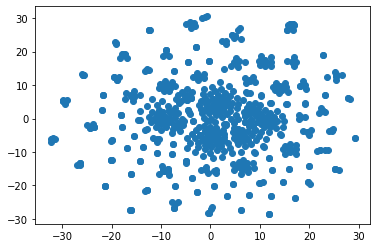

In [29]:
plt.scatter(df_pca['x'], df_pca['y'])
plt.show()

C:\Users\jwwst\anaconda3\lib\site-packages\sklearn\utils\validation.py:1688: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.
  warnings.warn(
C:\Users\jwwst\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1036: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=3.
  warnings.warn(
C:\Users\jwwst\anaconda3\lib\site-packages\sklearn\utils\validation.py:1688: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.
  warnings.warn(
C:\Users\jwwst\anaconda3\lib\site-packages\sklearn\utils\validation.py:1688: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.


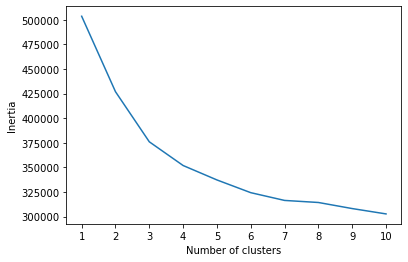

In [32]:
inertia = []

k = list(range(1, 11))


# Looking for the best k
for i in k:
    km = KMeans(n_clusters=i, random_state=0)
    km.fit(df_pca)
    inertia.append(km.inertia_)

# Define a DataFrame to plot the Elbow Curve using hvPlot
elbow_data = {"k": k, "inertia": inertia}
df_elbow = pd.DataFrame(elbow_data)

plt.plot(df_elbow['k'], df_elbow['inertia'])
plt.xticks(range(1,11))
plt.xlabel('Number of clusters')
plt.ylabel('Inertia')
plt.show()

In [33]:
def get_clusters(k, data):
    # Initialize the K-Means model
    model = KMeans(n_clusters=k, random_state=0)

    # Train the model
    model.fit(data)

    # Predict clusters
    predictions = model.predict(data)

    # Create return DataFrame with predicted clusters
    data["class"] = model.labels_

    return data

In [34]:
clusters = get_clusters(7, df_pca)

C:\Users\jwwst\anaconda3\lib\site-packages\sklearn\utils\validation.py:1688: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.
  warnings.warn(
C:\Users\jwwst\anaconda3\lib\site-packages\sklearn\utils\validation.py:1688: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.
  warnings.warn(


In [36]:
clusters

,0,1,2,3,4,5,6,7,8,9,...,325,326,327,328,329,330,331,x,y,class
0,-0.226101,-0.080331,2.632282e-14,0.021795,1.596283,-0.113289,-0.506960,0.000402,0.918431,-1.407524,...,2.378491e+00,-8.703251e-01,1.455673e-02,-2.684944e-01,-7.624140e-01,-1.070619e+00,8.015890e-01,-0.990492,-5.617689,6
1,-0.206645,-0.081182,2.648621e-14,0.015973,1.595117,-0.113392,-0.506884,0.000488,0.920151,-1.409693,...,-8.566032e-01,-1.642487e+00,2.682828e+00,8.691545e-01,2.532190e-01,-1.174150e+00,2.283365e+00,0.155553,-8.542248,6
2,-0.088249,-0.060280,1.827167e-14,-0.019433,0.984104,-0.117442,-0.315232,-0.237058,0.295680,-0.463912,...,-9.200635e-16,-1.370156e-15,1.703821e-15,-1.505042e-15,-2.839702e-17,3.350849e-15,6.616506e-16,-6.412888,-2.724725,6
3,0.396491,-0.009955,2.811292e-15,-0.124441,2.657250,-0.187200,-0.669889,-0.403283,0.737416,-0.862951,...,1.204406e+00,-1.150393e+00,-4.489670e-01,1.511226e-01,2.472777e-01,2.600924e-01,-2.137606e+00,6.110335,-16.513319,0
4,-0.237785,-0.160110,4.606952e-14,-0.002394,-1.716964,-0.019178,0.196700,-0.058993,-0.217896,0.099514,...,1.817409e-16,9.711781e-16,-1.845806e-15,-1.658386e-15,1.249469e-15,-1.135881e-17,-7.156049e-16,-9.862513,-0.150411,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
680,2.590133,-0.160015,5.145208e-14,-1.037487,-0.060766,0.003436,0.021522,-0.243159,-0.708063,0.867886,...,1.413036e-14,7.321888e-14,3.080509e-14,-2.280849e-14,1.621129e-13,-5.888406e-14,-2.053673e-14,-29.373177,4.468903,2
681,-0.223711,-0.092484,2.981725e-14,0.015919,1.108780,-0.093776,-0.398426,-0.005886,0.694772,-1.116817,...,9.391463e-14,2.184299e-14,-5.159455e-14,1.686158e-13,-1.708926e-13,-6.042886e-14,-1.161822e-13,-26.453222,-13.648890,5
682,-0.051549,-0.213200,6.126378e-14,-0.078062,-3.149663,-0.020387,0.478750,0.058620,-0.119655,0.046895,...,-8.760240e-02,-1.115325e-01,9.201550e-01,1.388025e-01,1.382200e-01,2.272820e+00,-1.345895e+00,-8.827391,9.900604,1
683,-0.271249,-0.170750,5.152453e-14,0.007615,-2.153609,-0.005898,0.282815,-0.006078,-0.234770,0.112169,...,-1.243790e-15,-1.224622e-16,4.089171e-16,-4.429935e-16,2.714755e-15,-7.667196e-16,-6.884503e-16,-16.076838,6.922322,2


In [40]:
def show_clusters(df):
    plt.scatter(clusters['x'], clusters['y'], c=df['class'])
    plt.xlabel('X Score')
    plt.ylabel('Y Score')
    plt.show()

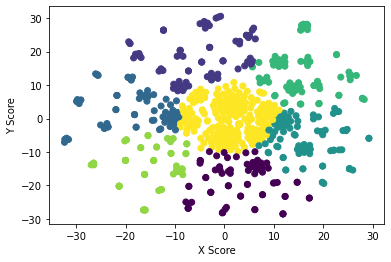

In [41]:
show_clusters(clusters)

As shown in the visualization above, there is very little mixing between groups. Therefore, we can conclude it is possible to create rough classifications for cryptocurrencies.